# Name : Sayak Mallick
# Project : Internship Tasks with The Sparks Foundation

## Task 1 : Prediction using Supervised ML

### Step 1 : Import libraries and the dataset

##### Importing libraries

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

##### Reading dataset and converting to dataframe

In [7]:
df = pd.read_csv('http://bit.ly/w-data')
df.head ()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Describing the dataset

In [8]:
df.describe ()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Checking the shape of dataset

In [6]:
df.shape

(25, 2)

##### Checking for missing values in the data

In [18]:
missing_1 = pd.isnull(df['Hours'])  

In [21]:
missing_2 = pd.isnull(df['Scores'])  

##### Since no data values are missing, there is no preprocessing required and we can move on to visualization of data.

### Step 2 : Visualizing dataset

##### Plotting scatter plot of Scores vs Hours

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

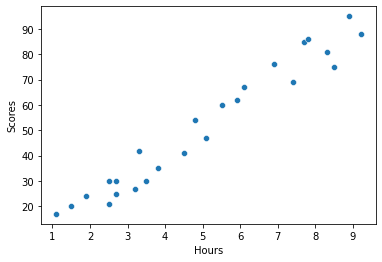

In [27]:
sns.scatterplot (x = 'Hours', y = 'Scores', data = df)

##### Plotting regression plot to see trend line 

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

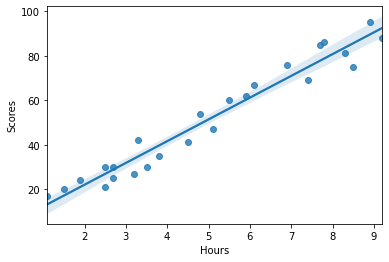

In [23]:
sns.regplot (x = 'Hours', y = 'Scores', data = df)

##### It is clear that there exists a strong positive linear correlation between Hours studied and Percentage of scores
##### We can proceed to determine the correlation coefficient between the variables

In [28]:
df.corr ()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### Strong positive correlation confirmed, we can now move on to splitting the dataset and preparing it for the next steps

### Step 3 : Splitting and preparation of dataset 

In [29]:
df.head ()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### iloc function is used to split data

In [58]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1:].values

In [43]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [59]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

##### Now, we split the data into training and test data in the 80:20 ratio

In [60]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### Step 4 : Training the model

##### Importing and initialising linear regression model

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

##### Training the model on the training data

In [62]:
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


##### Coefficient and intercept of line being fit :

In [65]:
lr.coef_

array([[9.91065648]])

In [63]:
lr.intercept_

array([2.01816004])

### Step 5 : Visualizing the model

##### Now, we visualize the model by plotting the test data and the regression line

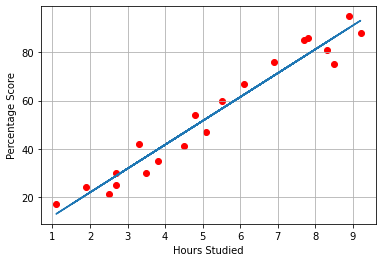

In [76]:
line = lr.coef_ * X + lr.intercept_

plt.show()
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

### Step 6 : Using model to make predictions

##### We use the trained model to make predictions

In [71]:
print(X_test)
y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


##### Comparing actual and predicted values by putting them in the dataframe

In [78]:
c = pd.DataFrame({ 'Actual': [y_test],'Predicted': [y_pred] })
c

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


##### Problem statement : Predicted score for 9.25 hours of studies

In [66]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = [93.69173249]


### Step 7 : Model Evaluation

##### Finally, we evaluate to gauge the performance of our model

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


### We find that, for 9.25 hours of study, Percentage of marks expected is around _93.7%_
### Further, the Mean Absolute Error of our model turns out to be around _4.18_

# Task 1 : completed. Thank you for reading